In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import  to_categorical
from sklearn.preprocessing import scale, LabelEncoder

In [ ]:
# Loding Dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ionosphere_data.csv")
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: ignored

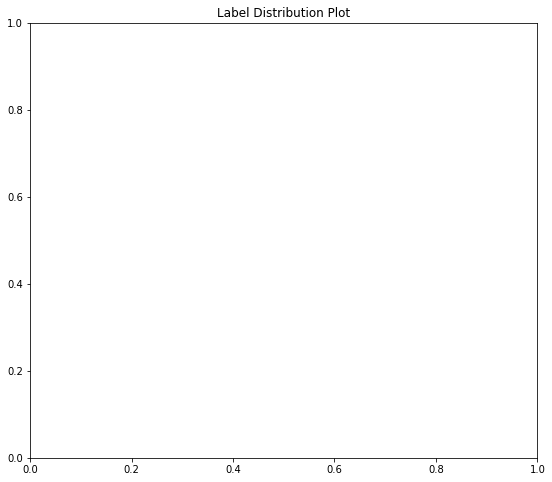

In [ ]:
# Visualizing The Data
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Label Distribution Plot')
sns.distplot(df.label)

In [ ]:
# Checking For Null Values
df.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

### OUR DATA CONTAINS NO NULL VALUES

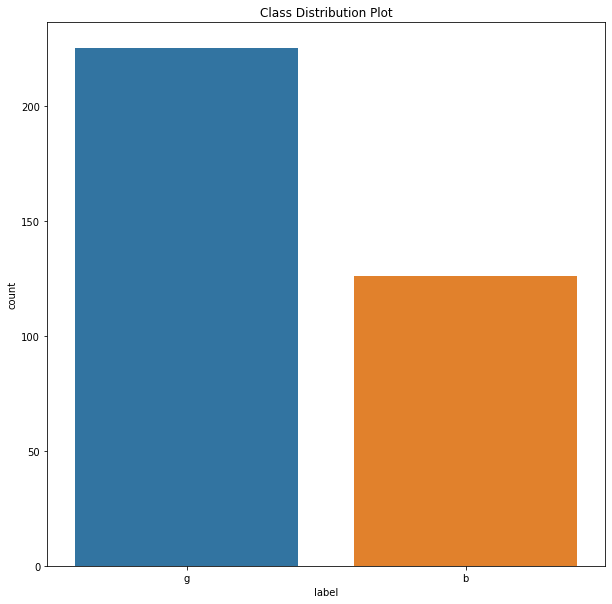

In [ ]:
# Class Distribution Plot
plt.figure(figsize=(10,10))
plt.title("Class Distribution Plot")
sns.countplot(x='label', data=df)

In [ ]:
# Droping Unecessary Columns
df = df.drop('feature2', axis=1)

In [ ]:
# One Hot Enconding Labels
encoding = {'g': 1, 'b': 0}
df.label.replace(encoding, inplace=True)

In [ ]:
# Shuffling Data
df = df.sample(frac = 1)
df

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
122,1,0.73810,0.83333,-0.76190,-0.23810,0.33333,-0.14286,0.45238,-0.14286,-0.67285,0.12808,0.33333,0.00000,0.28571,-0.07143,-0.38214,0.51163,0.23810,0.02381,0.45238,0.04762,0.16667,-0.26190,-0.57255,-0.10234,0.24889,-0.51079,1.00000,0.00000,-0.66667,-0.04762,0.26190,0.02381,0
337,1,0.90147,0.41786,0.64131,0.75725,0.30440,0.95148,-0.20449,0.96534,-0.55483,0.81191,-0.81857,0.50949,-0.96986,0.10345,-0.91456,-0.31412,-0.70163,-0.65461,-0.32354,-0.88999,0.05865,-0.94172,0.44483,-0.82154,0.74105,-0.55231,0.89415,-0.18725,0.87893,0.20359,0.70555,0.54852,1
10,1,1.00000,0.06655,1.00000,-0.18388,1.00000,-0.27320,1.00000,-0.43107,1.00000,-0.41349,0.96232,-0.51874,0.90711,-0.59017,0.89230,-0.66474,0.69876,-0.70997,0.70645,-0.76320,0.63081,-0.80544,0.55867,-0.89128,0.47211,-0.86500,0.40303,-0.83675,0.30996,-0.89093,0.22995,-0.89158,1
39,1,1.00000,0.02461,0.99672,0.04861,0.97545,0.07143,0.61745,-1.00000,0.91036,0.11147,0.88462,0.53640,0.82077,0.14137,0.76929,0.15189,1.00000,0.41003,0.65850,0.16371,0.60138,0.16516,0.54446,0.16390,0.48867,0.16019,0.43481,0.15436,0.38352,0.14677,1.00000,1.00000,0
121,1,1.00000,-0.92453,1.00000,0.75472,0.49057,-0.05660,0.62264,0.00000,1.00000,-0.00054,0.45283,0.07547,0.62264,-0.05660,0.98878,-0.00085,0.52830,0.00000,0.52830,0.07547,0.95190,-0.00112,1.00000,0.79245,0.92192,-0.00128,0.94340,-1.00000,1.00000,0.43396,0.43396,-0.11321,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,1,-1.00000,-0.59677,0.00000,0.00000,-1.00000,0.64516,-0.87097,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,-1.00000,0.00000,0.00000,0.29839,0.23387,1.00000,0.51613,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
343,1,0.35346,-0.13768,0.69387,-0.02423,0.68195,-0.03574,0.55717,-0.06119,0.61836,-0.10467,0.62099,-0.06527,0.59361,-0.07289,0.42271,-0.26409,0.58213,0.04992,0.49736,-0.08771,0.46241,-0.08989,0.45008,-0.00564,0.39146,-0.09038,0.35588,-0.10306,0.32232,-0.08637,0.28943,-0.08300,1
234,1,0.68729,1.00000,0.91973,-0.76087,0.81773,0.04348,0.76087,0.10702,0.86789,0.73746,0.70067,0.18227,0.75920,0.13712,0.93478,-0.25084,0.70736,0.18729,0.64883,0.24582,0.60201,0.77425,1.00000,-0.53846,0.89262,0.22216,0.71070,0.53846,1.00000,-0.06522,0.56522,0.23913,0
250,1,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,-1.00000,-1.00000,0.00000,0.00000,1.00000,-0.11111,0.00000,0.00000,0.00000,0.00000,-1.00000,1.00000,1.00000,1.00000,1.00000,-1.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0


In [ ]:
# Splitting The Dataset Into Training And Testing Data

# Training Data
train_data = df.iloc[:211,:]
train_data

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
122,1,0.73810,0.83333,-0.76190,-0.23810,0.33333,-0.14286,0.45238,-0.14286,-0.67285,0.12808,0.33333,0.00000,0.28571,-0.07143,-0.38214,0.51163,0.23810,0.02381,0.45238,0.04762,0.16667,-0.26190,-0.57255,-0.10234,0.24889,-0.51079,1.00000,0.00000,-0.66667,-0.04762,0.26190,0.02381,0
337,1,0.90147,0.41786,0.64131,0.75725,0.30440,0.95148,-0.20449,0.96534,-0.55483,0.81191,-0.81857,0.50949,-0.96986,0.10345,-0.91456,-0.31412,-0.70163,-0.65461,-0.32354,-0.88999,0.05865,-0.94172,0.44483,-0.82154,0.74105,-0.55231,0.89415,-0.18725,0.87893,0.20359,0.70555,0.54852,1
10,1,1.00000,0.06655,1.00000,-0.18388,1.00000,-0.27320,1.00000,-0.43107,1.00000,-0.41349,0.96232,-0.51874,0.90711,-0.59017,0.89230,-0.66474,0.69876,-0.70997,0.70645,-0.76320,0.63081,-0.80544,0.55867,-0.89128,0.47211,-0.86500,0.40303,-0.83675,0.30996,-0.89093,0.22995,-0.89158,1
39,1,1.00000,0.02461,0.99672,0.04861,0.97545,0.07143,0.61745,-1.00000,0.91036,0.11147,0.88462,0.53640,0.82077,0.14137,0.76929,0.15189,1.00000,0.41003,0.65850,0.16371,0.60138,0.16516,0.54446,0.16390,0.48867,0.16019,0.43481,0.15436,0.38352,0.14677,1.00000,1.00000,0
121,1,1.00000,-0.92453,1.00000,0.75472,0.49057,-0.05660,0.62264,0.00000,1.00000,-0.00054,0.45283,0.07547,0.62264,-0.05660,0.98878,-0.00085,0.52830,0.00000,0.52830,0.07547,0.95190,-0.00112,1.00000,0.79245,0.92192,-0.00128,0.94340,-1.00000,1.00000,0.43396,0.43396,-0.11321,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1,0.72727,-0.05000,0.89241,0.03462,1.00000,0.72727,0.66364,-0.05909,0.48182,-0.16818,0.81809,0.09559,0.56818,1.00000,0.50455,0.21818,0.66818,0.10000,1.00000,-0.30000,0.98636,-1.00000,0.57273,0.32727,0.56982,0.14673,0.42273,0.08182,0.48927,0.14643,1.00000,1.00000,0
128,1,0.00000,0.00000,-0.33672,0.85388,0.00000,0.00000,0.68869,-1.00000,0.97078,0.31385,-0.26048,-0.59212,-0.30241,0.65565,0.94155,0.16391,0.00000,0.00000,0.00000,0.00000,-0.18043,-1.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,0.04447,0.61881,0.00000,0.00000,0
97,1,0.97714,0.19049,0.82683,0.46259,0.71771,0.58732,0.47968,0.84278,0.31409,0.92643,0.10289,0.93945,-0.13254,0.84290,-0.32020,0.91624,-0.52145,0.79525,-0.68274,0.49508,-0.77408,0.33537,-0.85376,0.17849,-0.83314,-0.01358,-0.82366,-0.19321,-0.67289,-0.33662,-0.59943,-0.49700,1
42,1,0.90932,0.08791,0.86528,0.16888,1.00000,0.16598,0.55187,0.68154,0.70207,0.36719,0.16286,0.42739,0.57620,0.46086,0.51067,0.49618,0.31639,0.12967,0.37824,0.54462,0.31274,0.55826,0.24856,0.56527,0.18626,0.56605,0.12635,0.56101,0.06927,0.55061,0.12137,0.67739,1


In [ ]:
# Testing Data
test_data = df.iloc[211:,:]
test_data

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
190,0,-1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,-1.00000,-1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
309,1,0.83789,0.42904,0.72113,0.58385,0.45625,0.78115,0.16470,0.82732,-0.13012,0.86947,-0.46177,0.78497,-0.59435,0.52070,-0.78470,0.26529,-0.84014,0.03928,-0.62041,-0.31351,-0.47412,-0.48905,-0.37298,-0.67796,-0.05054,-0.62691,0.14690,-0.45911,0.37093,-0.39167,0.48319,-0.24313,1
202,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.85000,-1.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,1.00000,-1.00000,-0.60000,-1.00000,1.00000,1.00000,-1.00000,-0.20000,1.00000,-1.00000,0.00000,1.00000,0.00000,0.00000,0
114,1,0.91353,0.81586,-0.72973,1.00000,-0.39466,0.55735,0.05405,0.29730,-0.18599,-0.10241,-0.03158,-0.08970,0.01401,-0.03403,0.01108,-0.00537,0.00342,0.00097,0.00048,0.00075,-0.00003,0.00019,-0.00003,0.00002,-0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
331,1,0.74468,0.10638,0.88706,0.00982,0.88542,0.01471,0.87234,-0.01418,0.73050,0.10638,0.87657,0.02912,0.87235,0.03382,0.95745,0.07801,0.95035,0.04255,0.85597,0.04743,0.84931,0.05178,0.87234,0.11348,0.83429,0.06014,0.74468,-0.03546,0.81710,0.06800,0.80774,0.07173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,1,-1.00000,-0.59677,0.00000,0.00000,-1.00000,0.64516,-0.87097,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,-1.00000,0.00000,0.00000,0.29839,0.23387,1.00000,0.51613,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
343,1,0.35346,-0.13768,0.69387,-0.02423,0.68195,-0.03574,0.55717,-0.06119,0.61836,-0.10467,0.62099,-0.06527,0.59361,-0.07289,0.42271,-0.26409,0.58213,0.04992,0.49736,-0.08771,0.46241,-0.08989,0.45008,-0.00564,0.39146,-0.09038,0.35588,-0.10306,0.32232,-0.08637,0.28943,-0.08300,1
234,1,0.68729,1.00000,0.91973,-0.76087,0.81773,0.04348,0.76087,0.10702,0.86789,0.73746,0.70067,0.18227,0.75920,0.13712,0.93478,-0.25084,0.70736,0.18729,0.64883,0.24582,0.60201,0.77425,1.00000,-0.53846,0.89262,0.22216,0.71070,0.53846,1.00000,-0.06522,0.56522,0.23913,0
250,1,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,-1.00000,-1.00000,0.00000,0.00000,1.00000,-0.11111,0.00000,0.00000,0.00000,0.00000,-1.00000,1.00000,1.00000,1.00000,1.00000,-1.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0


In [ ]:
# Dropping Labels From Training And Testing Data

# Train Labels
train_labels = train_data.pop('label')
train_labels

122    0
337    1
10     1
39     0
121    1
      ..
87     0
128    0
97     1
42     1
180    0
Name: label, Length: 211, dtype: int64

In [ ]:
# Test Labels
test_labels = test_data.pop('label')
test_labels

190    0
309    1
202    0
114    0
331    1
      ..
212    0
343    1
234    0
250    0
196    0
Name: label, Length: 140, dtype: int64

In [ ]:
# Standardizing Training And Testing Data
from sklearn.preprocessing import StandardScaler
train_data = StandardScaler().fit_transform(train_data)
train_data

array([[ 0.35824886,  0.16197363,  1.73461977, ..., -0.01917588,
        -0.21719573,  0.09962098],
       [ 0.35824886,  0.49875198,  0.81030524, ...,  0.48853817,
         0.65442962,  1.27393147],
       [ 0.35824886,  0.7018662 ,  0.02873031, ..., -1.72356793,
        -0.2799669 , -1.94903845],
       ...,
       [ 0.35824886,  0.65474156,  0.30446512, ..., -0.60326631,
        -1.90942397, -1.06596125],
       [ 0.35824886,  0.51493432,  0.07625085, ...,  1.18989132,
        -0.49329064,  1.56234487],
       [ 0.35824886,  0.7018662 ,  2.10541791, ...,  0.48481939,
         0.89686976,  0.2230253 ]])

In [ ]:
test_data = StandardScaler().fit_transform(test_data)
test_data

array([[-3.        , -3.14483813, -2.41311367, ..., -0.08968249,
        -0.58366613, -0.13700837],
       [ 0.33333333,  0.43639044,  0.93355186, ..., -0.82209961,
         0.31287019, -0.63045748],
       [ 0.33333333, -1.19628377, -0.07121594, ...,  1.78030275,
        -0.58366613, -0.13700837],
       ...,
       [ 0.33333333,  0.14293815,  2.27068179, ..., -0.21164293,
         0.465073  ,  0.34832246],
       [ 0.33333333, -1.19628377, -0.07121594, ..., -0.08968249,
         1.27178684,  1.8925606 ],
       [ 0.33333333,  0.75227059, -2.41311367, ...,  1.78030275,
         1.27178684,  1.8925606 ]])

In [ ]:
n_features = train_data.shape[1]
n_features

33

In [ ]:
# Making Base Model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape = (n_features,)))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compilation Step
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                544       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                204       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0

In [ ]:
# Fitting Model On 100 Epochs
history = model.fit(train_data, train_labels, epochs = 100, batch_size = 8)

Epoch 1/100
27/27 [==============================] - 1s 1ms/step - loss: 0.6685 - accuracy: 0.6801
Epoch 2/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6325 - accuracy: 0.6718
Epoch 3/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6168 - accuracy: 0.7195
Epoch 4/100
27/27 [==============================] - 0s 1ms/step - loss: 0.5875 - accuracy: 0.6761
Epoch 5/100
27/27 [==============================] - 0s 1ms/step - loss: 0.5323 - accuracy: 0.7339
Epoch 6/100
27/27 [==============================] - 0s 1ms/step - loss: 0.5283 - accuracy: 0.8143
Epoch 7/100
27/27 [==============================] - 0s 1ms/step - loss: 0.4985 - accuracy: 0.7927
Epoch 8/100
27/27 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.8589
Epoch 9/100
27/27 [==============================] - 0s 1ms/step - loss: 0.3935 - accuracy: 0.8660
Epoch 10/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.8176
Epoch 11/

In [ ]:
# Feeding History In A DataFrame
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.tail()

,loss,accuracy,epoch
95,0.036853,0.995261,95
96,0.034190,0.990521,96
97,0.034575,0.990521,97
98,0.076025,0.985782,98
99,0.043766,0.981043,99


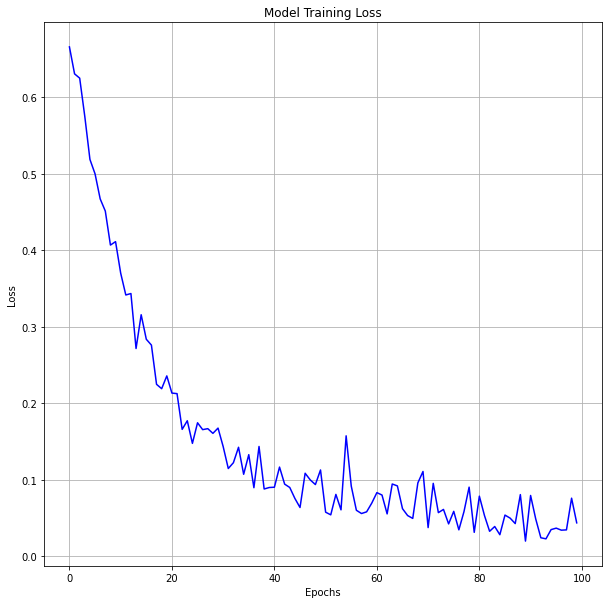

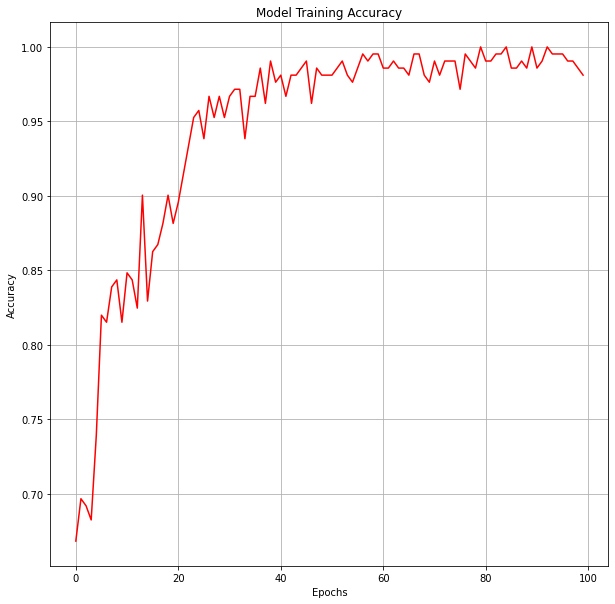

In [ ]:
# Plotting Loss And Accuracy
plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model Training Loss")
plt.plot(history_df['epoch'], history_df['loss'], color = 'blue')
plt.grid()

plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model Training Accuracy")
plt.plot(history_df['epoch'], history_df['accuracy'], color = 'red')
plt.grid()
plt.show()

In [ ]:
# Making Predictions On Test Data
predictions = model.predict(test_data)
predictions[:10]

array([[9.8733679e-22],
       [9.9998903e-01],
       [4.1055453e-05],
       [7.9309911e-02],
       [9.9940205e-01],
       [9.9990797e-01],
       [9.9938107e-01],
       [9.9792415e-01],
       [9.9926150e-01],
       [9.9943042e-01]], dtype=float32)

In [ ]:
# Testing Model On Test Data
testing = model.evaluate(test_data, test_labels)
testing

5/5 [==============================] - 0s 2ms/step - loss: 0.2971 - accuracy: 0.9214


[0.2970801889896393, 0.9214285612106323]

In [ ]:
# Making Classification Report
from sklearn.metrics import classification_report
model_classification_report = classification_report(test_labels, predictions.round(), output_dict=True)

In [ ]:
classification_report_df = pd.DataFrame(model_classification_report)
classification_report_df

,0,1,accuracy,macro avg,weighted avg
precision,0.958333,0.902174,0.921429,0.930254,0.924237
recall,0.836364,0.976471,0.921429,0.906417,0.921429
f1-score,0.893204,0.937853,0.921429,0.915528,0.920312
support,55.000000,85.000000,0.921429,140.000000,140.000000


In [ ]:
# Testing Loss And Testing Accuracy
print(f"Testing Loss: {testing[0]}")
print(f"Testing Accuracy: {testing[1]}")

Testing Loss: 0.2970801889896393
Testing Accuracy: 0.9214285612106323


In [ ]:
# Saving Model
model.save('IonosphereModel.h5')